## Uçtan Büyük Veride Makine Öğrenmesi
### Spark Session ve Veri Seti

In [6]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import findspark

In [3]:
findspark.init('/mnt/c/Users/abdul/spark-3.1.2-bin-hadoop3.2')

In [4]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

In [8]:
spark = SparkSession.builder.master('local'). \
                    appName('Churn_Modellemesi'). \
                    config('spark.executer.memory' , '16gb'). \
                    getOrCreate() 

sc = spark.sparkContext
sc

<SparkContext master=local appName=Churn_Modellemesi>

In [9]:
# read

In [9]:
spark_df = spark.read.csv('churn.csv',
                          header=True,
                          inferSchema=True,sep=',')

spark_df.cache() # memory köprüleme

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [10]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [11]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



21/08/03 17:18:03 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Names, Age, Total_Purchase, Account_Manager, Years, Num_Sites, Churn
 Schema: _c0, Names, Age, Total_Purchase, Account_Manager, Years, Num_Sites, Churn
Expected: _c0 but found: 
CSV file: file:///mnt/c/Users/abdul/Desktop/ders/ai-journey/udemy_data_science/big_data/churn.csv


In [13]:
# değişken adlarını düzenleyelim.

In [14]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns]) # küçük harfe çevirme

In [15]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [16]:
# _c0 değişkenin adını değiştirme

In [17]:
spark_df = spark_df.withColumnRenamed('_c0','index')

In [18]:
spark_df.show()

+-----+-------------------+----+--------------+---------------+-----+---------+-----+
|index|              names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------------+----+--------------+---------------+-----+---------+-----+
|    0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|    3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|    4|     Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
|    5|   Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|
|    6|        Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|
|    7|      Zachary Walsh|32.0|       9885.12|              1| 6.92|      9.0|    1|
|    8|        Ashlee Carr|43.0|       14062.6|       

In [19]:
# gözlem sayısı

In [20]:
spark_df.count()

900

In [21]:
# unique değerler kontrolü

In [22]:
spark_df.distinct().count()

900

In [52]:
# değişken üzerinde kontrol

In [23]:
spark_df.select('names').distinct().count()

899

In [24]:
# aynı isimde 2 kişi var

In [25]:
spark_df.groupby('names').count().sort('count',ascending=False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|   Jennifer Wood|    2|
|     John Barber|    1|
|Patrick Robinson|    1|
+----------------+-----+
only showing top 3 rows



In [56]:
# bu iki gözlemi kontrol edelim

In [27]:
spark_df.filter(spark_df.names == 'Jennifer Wood').show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [58]:
# farklı kişiler 

In [59]:
# diyelim aynı kişiler

In [60]:
# örneklem çekme

In [28]:
spark_df.where(spark_df.index == 439).show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [65]:
# örneklemin değerlerini python'a çekmek | string , int olarak

In [29]:
jen_age = spark_df.where(spark_df.index == 439).collect()[0]['age']

In [30]:
jen_age

48.0

## Keşifçi Veri Analizi

In [71]:
# describe

In [31]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [72]:
# görseli düzeltmek için

In [32]:
spark_df.select('age','total_purchase','account_manager','years','num_sites','churn').describe().toPandas().T

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [76]:
# yaş ort+std üstünde olanların sayısına bakalım

In [33]:
spark_df.filter(spark_df.age > 47).count()

161

In [34]:
# turn'e göre groupby ve count

In [35]:
spark_df.groupby('churn').count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [79]:
# churn'e göre total_purchase ortamaları

In [36]:
spark_df.groupby('churn').agg({'total_purchase' : 'mean'}).show()

+-----+-------------------+
|churn|avg(total_purchase)|
+-----+-------------------+
|    1| 10192.179933333337|
|    0| 10036.952853333332|
+-----+-------------------+



In [81]:
# churn'e göre year ort

In [37]:
spark_df.groupby('churn').agg({'years' : 'mean'}).show()

+-----+------------------+
|churn|        avg(years)|
+-----+------------------+
|    1|5.8835999999999995|
|    0|5.1510666666666625|
+-----+------------------+



In [84]:
# correlasyon matrixi bakalım

In [38]:
corr_data = spark_df.drop('index','names').toPandas() 

In [39]:
import seaborn as sns

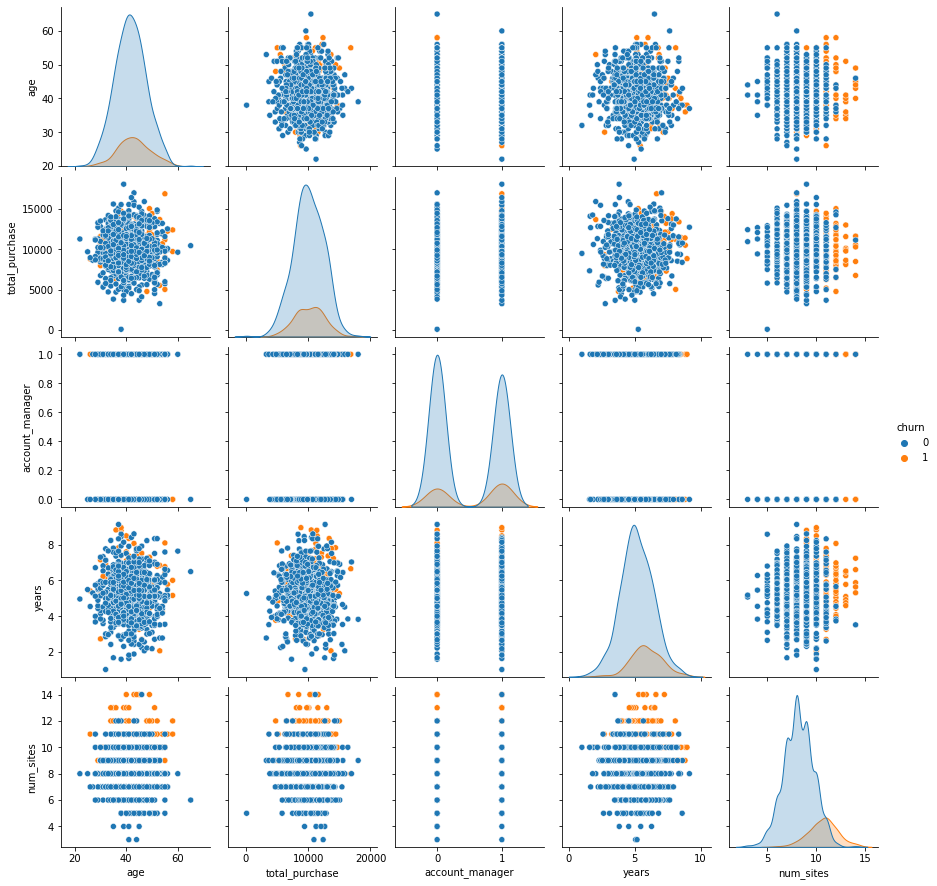

In [40]:
sns.pairplot(corr_data , hue='churn');

In [96]:
# matrix ve reg 

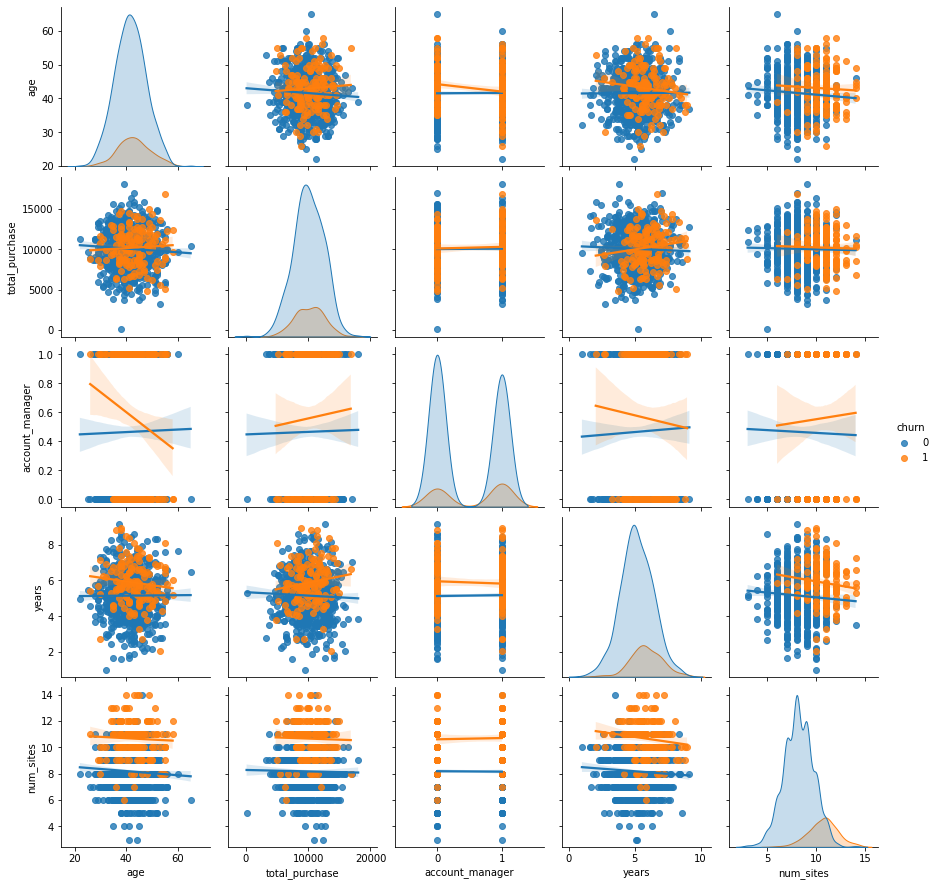

In [41]:
sns.pairplot(corr_data , hue='churn',kind ='reg');

## Veri Ön İşleme

In [42]:
# eksik verilerden kurtul

In [44]:
spark_df = spark_df.dropna()

In [100]:
# yeni bir değişken oluştur

In [45]:
spark_df = spark_df.withColumn('age_kare', spark_df.age ** 2)

In [46]:
spark_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
only showing top 3 rows



### Bağımlı Değişkenin Ayarlanması

In [104]:
# eğer bağımlı değişken string olsaydı onu int çevirmemiz gerekirdi

In [48]:
from pyspark.ml.feature import StringIndexer

In [49]:
# bağımlı değişkenlere label
# bağımsız değişkenlere feature

In [50]:
stringIndexer = StringIndexer(inputCol='churn' , outputCol='label' )

In [51]:
stringIndexer?

Type:           StringIndexer
String form:    StringIndexer_776bd01972e0
File:           /mnt/c/Users/abdul/spark-3.1.2-bin-hadoop3.2/python/pyspark/ml/feature.py
Docstring:     
A label indexer that maps a string column of labels to an ML column of label indices.
If the input column is numeric, we cast it to string and index the string values.
The indices are in [0, numLabels). By default, this is ordered by label frequencies
so the most frequent label gets index 0. The ordering behavior is controlled by
setting :py:attr:`stringOrderType`. Its default value is 'frequencyDesc'.

.. versionadded:: 1.4.0

Examples
--------
>>> stringIndexer = StringIndexer(inputCol="label", outputCol="indexed",
...     stringOrderType="frequencyDesc")
>>> stringIndexer.setHandleInvalid("error")
StringIndexer...
>>> model = stringIndexer.fit(stringIndDf)
>>> model.setHandleInvalid("error")
StringIndexerModel...
>>> td = model.transform(stringIndDf)
>>> sorted(set([(i[0], i[1]) for i in td.select(td.id, td

In [52]:
# çok sık görülen sınıfı 0 olarak atar

In [53]:
indexed = stringIndexer.fit(spark_df).transform(spark_df)

In [54]:
indexed.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'double')]

In [114]:
# label değişkeni oluştu

In [115]:
# double => int

In [55]:
spark_df = indexed.withColumn('label', indexed['label'].cast('integer'))

In [56]:
spark_df.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'int')]

### Bağımsız Değişlenlerin Ayarlanması

In [57]:
from pyspark.ml.feature import VectorAssembler

In [58]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_kare',
 'label']

In [121]:
# bağımsız değişkenlerin adlarını bir listede tutalım

In [59]:
independent_vars = ['age','total_purchase','account_manager','years','num_sites'] 

In [60]:
# vektör oluşturalım

In [61]:
vectorAssembler = VectorAssembler(inputCols=independent_vars, outputCol='features')

In [62]:
var_df = vectorAssembler.transform(spark_df)

In [126]:
# final df

In [63]:
final_df = var_df.select(['features','label'])

In [64]:
final_df.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
+--------------------+-----+
only showing top 3 rows



### Test-Train

In [65]:
splits = final_df.randomSplit([0.7,0.3])

In [66]:
train_df = splits[0] # 0.7

In [67]:
test_df = splits[1] # 0.3

In [68]:
train_df

DataFrame[features: vector, label: int]

In [69]:
test_df

DataFrame[features: vector, label: int]

## GBM ile Müşteri Terk Modellemesi

In [70]:
from pyspark.ml.classification import GBTClassifier

In [71]:
gbm =  GBTClassifier(maxIter= 10 ,
                     featuresCol='features',
                     labelCol='label')

In [74]:
gbm_model = gbm.fit(train_df)

In [81]:
# tahmin

In [82]:
# transform kullanarak baştaki inputun tarzında bir sonuç almamızı sağlar.

In [76]:
y_pred = gbm_model.transform(test_df)

In [77]:
y_pred.show(2)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[25.0,9672.03,0.0...|    0|[1.06404318801917...|[0.89360320461467...|       0.0|
|[26.0,8787.39,1.0...|    1|[0.60150022792782...|[0.76905811780929...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 2 rows



21/08/03 17:57:51 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
21/08/03 17:57:51 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [83]:
# label ile tahminleri alalım

In [78]:
ac = y_pred.select('label','prediction')

In [85]:
# accuracy değerimiz 

In [84]:
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8402777777777778

### Model Tuning

In [86]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder,CrossValidator

In [87]:
evaluator = BinaryClassificationEvaluator()

In [88]:
paramGrid = ParamGridBuilder().  \
                addGrid(gbm.maxDepth , [2,4,6]). \
                addGrid(gbm.maxBins , [20,30]). \
                addGrid(gbm.maxIter , [10,20]). \
                build()

In [89]:
cv = CrossValidator(estimator=gbm, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=10)

In [90]:
cv_model = cv.fit(train_df)

In [95]:
# tahmin değerleri alma

In [91]:
y_pred = cv_model.transform(test_df)

In [92]:
ac = y_pred.select('label','prediction')

In [99]:
# accuracy

In [93]:
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8958333333333334

In [98]:
# AUC Eğrinin altında kalan alan değeri

In [97]:
evaluator.evaluate(y_pred)

0.9081415660363028

### Yeni Müşteriler ile Tahminler

In [100]:
import pandas as pd

In [101]:
import pandas as pd
names = pd.Series(["Ali Ahmetoğlu", "Berkcan Tanerbey", "Harika Gündüz","Polat Alemdar", "Ata Bakmayan Ali"])
age = pd.Series([38, 43, 34, 50, 40])
total_purchase = pd.Series([30000, 10000, 6000, 30000, 100000])
account_manager = pd.Series([1,0,0,1,1])
years = pd.Series([20, 10, 3, 8, 30])
num_sites = pd.Series([30,8,8,6,50])


yeni_musteriler = pd.DataFrame({
    'names':names,
    'age': age,
    'total_purchase': total_purchase,
    'account_manager': account_manager ,
    'years': years,
    'num_sites': num_sites})

yeni_musteriler.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [103]:
yeni_musteriler

,names,age,total_purchase,account_manager,years,num_sites
0,Ali Ahmetoğlu,38,30000,1,20,30
1,Berkcan Tanerbey,43,10000,0,10,8
2,Harika Gündüz,34,6000,0,3,8
3,Polat Alemdar,50,30000,1,8,6
4,Ata Bakmayan Ali,40,100000,1,30,50


In [104]:
# bu dataframe'i oluşturduğumuz modele verebilmek için spark DF'ye dönüştürmemiz lazım

In [105]:
yeni_sdf = spark.createDataFrame(yeni_musteriler)

In [106]:
type(yeni_sdf)

pyspark.sql.dataframe.DataFrame

In [107]:
yeni_sdf.show()

+----------------+---+--------------+---------------+-----+---------+
|           names|age|total_purchase|account_manager|years|num_sites|
+----------------+---+--------------+---------------+-----+---------+
|   Ali Ahmetoğlu| 38|         30000|              1|   20|       30|
|Berkcan Tanerbey| 43|         10000|              0|   10|        8|
|   Harika Gündüz| 34|          6000|              0|    3|        8|
|   Polat Alemdar| 50|         30000|              1|    8|        6|
|Ata Bakmayan Ali| 40|        100000|              1|   30|       50|
+----------------+---+--------------+---------------+-----+---------+



In [108]:
# vektör formuna çevirilme

In [110]:
new_customers = vectorAssembler.transform(yeni_sdf)

In [112]:
# tahmin

In [111]:
results = cv_model.transform(new_customers)

In [115]:
results.select('names','prediction').show()

+----------------+----------+
|           names|prediction|
+----------------+----------+
|   Ali Ahmetoğlu|       1.0|
|Berkcan Tanerbey|       0.0|
|   Harika Gündüz|       0.0|
|   Polat Alemdar|       0.0|
|Ata Bakmayan Ali|       1.0|
+----------------+----------+

